<a href="https://colab.research.google.com/github/tilopez/stuff/blob/master/7_OLD_distancias_iguales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Toolboxes y funciones

In [0]:
!pip install pygsp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import spatial
from sklearn.metrics import accuracy_score
from pygsp import graphs, filters, plotting
np.set_printoptions(suppress=True)
import seaborn as sns

     |████████████████████████████████| 1.8MB 9.1MB/s 


In [0]:
# para evaluar la matriz de resultados esperados, a partir de las distancias
def exp_matrix( dist, exp ):
  dist = dist.round(8)
  rta = np.zeros(exp.shape)
  [n,m] = exp.shape

  for i in range(n):
    fila_dist = np.concatenate((dist[i,0:i],dist[i,i+1:n]))
    comps = np.zeros(m)
    cont = 0
    for j in range(n-2):
      for k in range(j+1,n-1):
        comps[cont] = 0 if fila_dist[j] < fila_dist[k] else 1 if fila_dist[j] == fila_dist[k] else 2
        cont = cont + 1
    rta[i,:] = comps

  eva = []
  genes = []
  cant = 0

  for i in range(n):
    word = []
    for j in range(m):
      if rta[i,j] == exp[i,j]:
        word.append("right")
      else:      
        word.append("WRONG")
        cant += 1
        
        # determinar los genes que dieron el error
        cont = 0
        for k in range(n-1):
          for l in range(k,n):
            if k != i and l != i and k != l:
              if cont == j:
                genes.append([i+1, k+1, l+1])
              cont += 1

    eva.append(word)

  return(eva,cant,genes)

In [0]:
# crear genes con 0s y 1s
def labgene(labs,N):
  g = np.zeros(N)
  for i in labs:
    g[i] = 1
  return g

In [0]:
# para graficar 3 genes o partir de los indices dentro del vector de genes
def plot_comparacion( id_genes ):
  
  for i in range(len(id_genes)):
    id_genes[i] = id_genes[i] - 1

  fig, ax = plt.subplots(1, 3, figsize=(20,4))
  for i in range(3):
    ax1 = plt.subplot(1, 3, i+1);
    G.plot_signal(genes[id_genes[i]], ax=ax1, plot_name=id_genes)

In [0]:
def plot_genes( id_genes ):
  
  for i in range(len(id_genes)):
    id_genes[i] = id_genes[i] - 1

  if len(id_genes)>3:
    size_x = 20
  elif len(id_genes)>2:
    size_x = 15
  else:
    size_x = 10


  fig, ax = plt.subplots(1, len(id_genes), figsize=(size_x,4))
  for i in range(len(id_genes)):
    ax1 = plt.subplot(1, len(id_genes), i+1);
    G.plot_signal(genes[id_genes[i]], ax=ax1, plot_name=id_genes[i]+1)

# Grafo y genes

In [0]:
ini = np.array([0, 1, 1, 2, 3, 4, 4, 5, 5, 6, 7,  9,  10])
fin = np.array([1, 2, 3, 4, 5, 6, 7, 7, 8, 9, 10, 11, 12])

N = fin.max()+1
A = np.zeros((N,N))

for i, f in zip(ini, fin):
    A[i,f] = 1
A = A + A.T

# Matriz de grado
d = np.sum(A,1)
D = np.diag(d)

# Laplaciano
L = D - A

print(A)

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


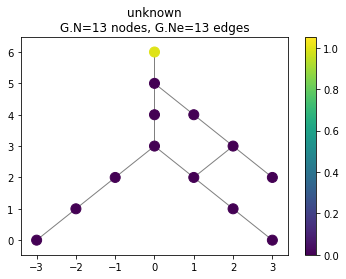

In [0]:
G = graphs.Graph(A)

coords = [[0, 6], [0, 5], [0, 4], [1, 4], [0, 3], [2, 3], [-1, 2], [1, 2], [3, 2], [-2, 1], [2, 1], [-3, 0], [3, 0]]
G.set_coordinates(coords)

G.plot_signal(np.concatenate(([1],[0]*12)))

## Primera generacion

In [0]:
genes = []

genes.append(labgene([0],N))
genes.append(labgene([0,1],N))
genes.append(labgene([0,1,2],N))
genes.append(labgene([0,1,2,4],N))
genes.append(labgene([0,1,2,4,6],N))
genes.append(labgene([0,1,2,4,6,9],N))
genes.append(labgene([0,1,2,4,6,9,11],N))

genes.append(labgene([0,1,2,3,4,5,7],N))
genes.append(labgene([0,1,2,3,4,5,7,10],N))
genes.append(labgene([0,1,2,3,4,5,7,10,12],N))

genes.append(labgene([0,1,3],N))
genes.append(labgene([0,1,3,5],N))
genes.append(labgene([0,1,3,5,8],N))

#for i in range(len(genes)):
#    G.plot_signal(genes[i])

## Segunda generacion, combinaciones de la primera

In [0]:
generacion_2 = []
for i in genes:
  for j in genes:
    generacion_2.append(np.logical_or(i,j).astype(int))

generacion_2 = np.unique(generacion_2,axis=0)

genes = np.concatenate((genes,generacion_2))

genes = np.unique(genes,axis=0)

## Tercera generacion, combinaciones de las dos anteriores

In [0]:
generacion_3 = []
for i in genes:
  for j in generacion_2:
    generacion_3.append(np.logical_or(i,j).astype(int))

generacion_3 = np.unique(generacion_3,axis=0)

genes = np.concatenate((genes,generacion_3))

genes = np.unique(genes,axis=0)

## Genes

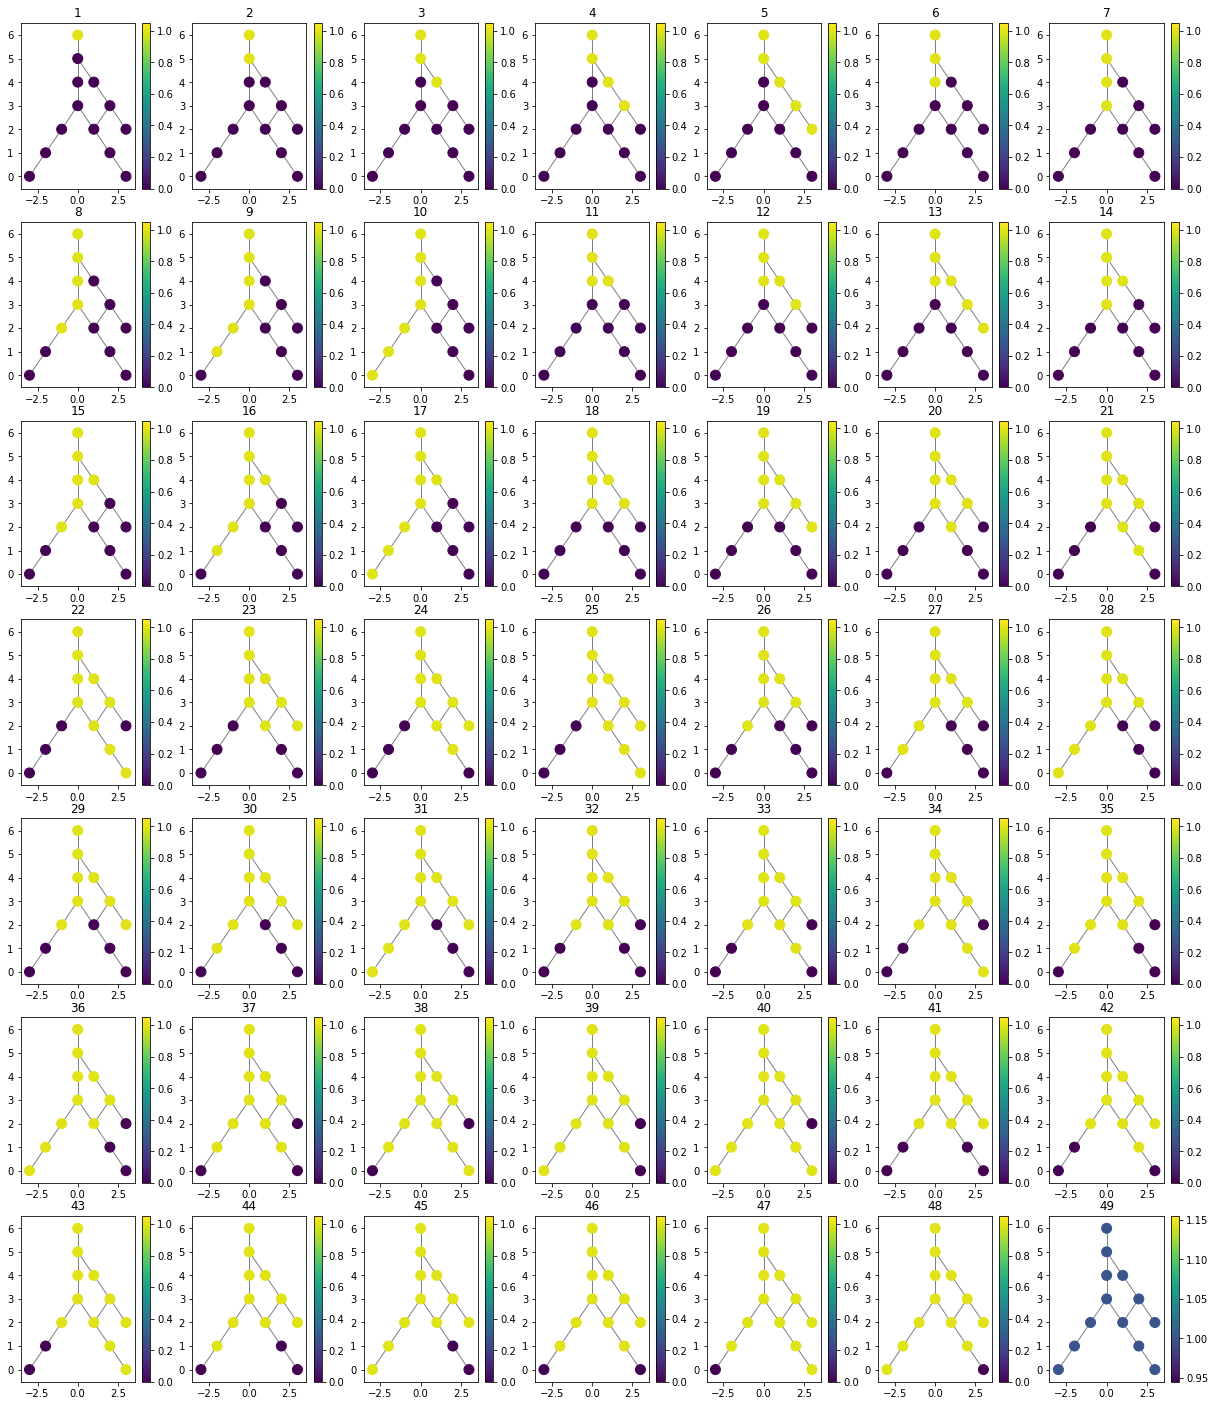

In [0]:
plotting.BACKEND = 'matplotlib'
fig, ax = plt.subplots(7, 7, figsize=(21,25))

for i in range(len(genes)):
    ax1 = plt.subplot(7, 7, i+1 % 7)
    G.plot_signal(genes[i], ax=ax1, plot_name=str(i+1))

# Bases

[[1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0.]
 [1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1.]]


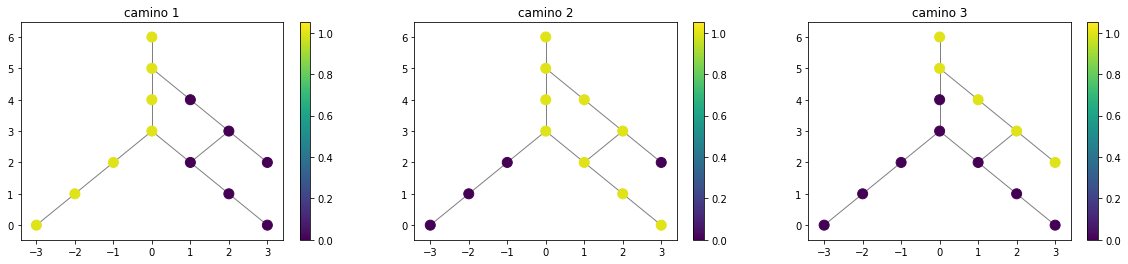

In [0]:
b1_camino1 = labgene([0,1,2,4,6,9,11],N)
b1_camino2 = labgene([0,1,2,3,4,5,7,10,12],N)
b1_camino3 = labgene([0,1,3,5,8],N)

plotting.BACKEND = 'matplotlib'
fig, ax = plt.subplots(1, 3, figsize=(20,4))

ax1 = plt.subplot(1, 3, 1);     G.plot_signal(b1_camino1, ax=ax1, plot_name="camino 1")
ax1 = plt.subplot(1, 3, 2);     G.plot_signal(b1_camino2, ax=ax1, plot_name="camino 2")
ax1 = plt.subplot(1, 3, 3);     G.plot_signal(b1_camino3, ax=ax1, plot_name="camino 3")

B1 = np.column_stack((b1_camino1, b1_camino2, b1_camino3)).T

d1=np.sum(B1.T,axis=0)
idx1=np.argsort(d1)
B1=B1[idx1,:]
print(B1)

[[1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0.]
 [1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1.]
 [1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1.]]


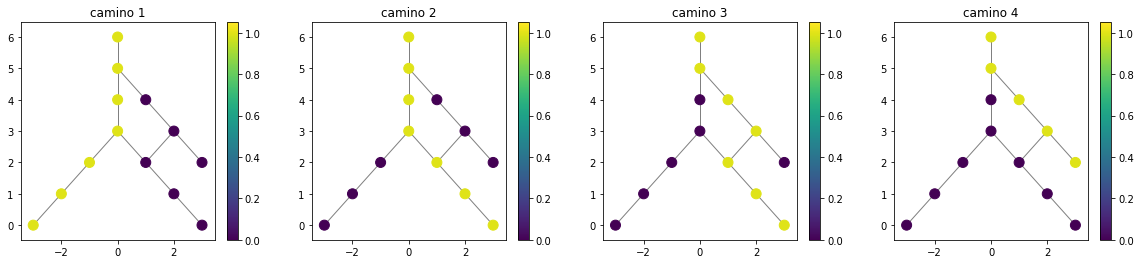

In [0]:
b2_camino1 = labgene([0,1,2,4,6,9,11],N)
b2_camino2 = labgene([0,1,2,4,7,10,12],N)
b2_camino3 = labgene([0,1,3,5,7,10,12],N)
b2_camino4 = labgene([0,1,3,5,8],N)

plotting.BACKEND = 'matplotlib'
fig, ax = plt.subplots(1, 4, figsize=(20,4))

ax1 = plt.subplot(1, 4, 1);     G.plot_signal(b2_camino1, ax=ax1, plot_name="camino 1")
ax1 = plt.subplot(1, 4, 2);     G.plot_signal(b2_camino2, ax=ax1, plot_name="camino 2")
ax1 = plt.subplot(1, 4, 3);     G.plot_signal(b2_camino3, ax=ax1, plot_name="camino 3")
ax1 = plt.subplot(1, 4, 4);     G.plot_signal(b2_camino4, ax=ax1, plot_name="camino 4")

B2 = np.column_stack((b2_camino1, b2_camino2, b2_camino3, b2_camino4)).T

d2=np.sum(B2.T,axis=0)
idx2=np.argsort(d2)
B2=B2[idx2,:]
print(B2)

In [0]:
autoval, autovec = np.linalg.eigh(L)
idx = autoval.argsort()
val = autoval[idx]
B3 = autovec[:,idx]

# Calcular distancias

In [0]:
n = len(genes)

dist_B1 = np.zeros((n,n))
dist_B2 = np.zeros((n,n))
dist_B3 = np.zeros((n,n,13))
dist_C = np.zeros((n,n))
dist_A = np.zeros((n,n))
genes = np.column_stack(genes).T

ggf1 = np.dot(B1, genes.T).T
for i in range(n):
  for j in range(i,n):
    dist_B1[i,j] = np.linalg.norm(ggf1[i,:]-ggf1[j,:])
dist_B1 = dist_B1 + dist_B1.T

ggf2 = np.dot(B2, genes.T).T
for i in range(n):
  for j in range(i,n):
    dist_B2[i,j] = np.linalg.norm(ggf2[i,:]-ggf2[j,:])
dist_B2 = dist_B2 + dist_B2.T

for k in range(13):
  ggfl = np.dot(B3[:,-13+k:].T, genes.T).T
  for i in range(n):
    for j in range(i,n):
      dist_B3[i,j,13-k-1] = np.linalg.norm(ggfl[i,:]-ggfl[j,:])
  dist_B3[:,:,13-k-1]  = dist_B3[:,:,13-k-1]  + dist_B3[:,:,13-k-1].T

# distancia coseno
for i in range(n):
  for j in range(i,n):
    dist_C[i,j] = spatial.distance.cosine(genes[i],genes[j])
dist_C = dist_C + dist_C.T

# accuracy
for i in range(n):
  for j in range(i,n):
    dist_A[i,j] = 1 - accuracy_score(genes[i], genes[j])
dist_A = dist_A + dist_A.T

In [0]:
n_dist_B3 = dist_B3

gen0 = np.zeros((13,1))
gen1 = np.ones((13,1))

ggf1_0 = np.dot(B1,gen0)
ggf1_1 = np.dot(B1,gen1)
dist_max_B1 = np.linalg.norm(ggf1_0-ggf1_1)

ggf2_0 = np.dot(B2,gen0)
ggf2_1 = np.dot(B2,gen1)
dist_max_B2 = np.linalg.norm(ggf2_0-ggf2_1)

dist_max_B3 = np.zeros((13,1))
for k in range(13):
  dist_max_B3[k] = sum(sum(np.power(B3[:,-13+k:],2)))
  n_dist_B3[:,:,k] = n_dist_B3[:,:,k] / dist_max_B3[k]

# distancias normalizadas
n_dist_B1 = dist_B1/dist_max_B1
n_dist_B2 = dist_B2/dist_max_B2
n_dist_C = dist_C
n_dist_A = dist_A

# Funcion para buscar distancias similares

In [0]:
# Dados dos indices de genes, la matriz de las distancias y un umbral
# busca los genes con distancia que similar a la
# de los genes dados
# Supone que ya están calculadas las distancias, y usa las matrices 
# del código anterior

def sim_dist( gen1, gen2, dist, umbral ):

  gen_sim = []
  dist12 = dist[gen1-1,gen2-1]
  n,_ = dist.shape
  
  for i in range(n):
    if abs(dist[gen1-1,i] - dist12) <= umbral and (i != gen2-1):
      gen_sim.append([gen1,i+1])
  
  return gen_sim

In [0]:
gen1 = 10
gen2 = 5

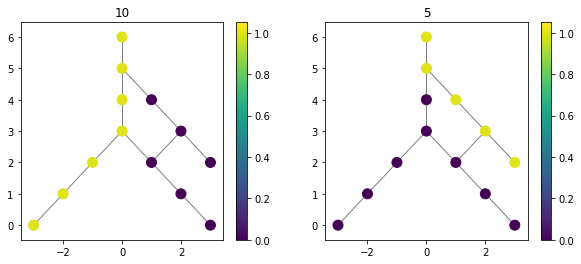

In [0]:
plot_genes([gen1,gen2])

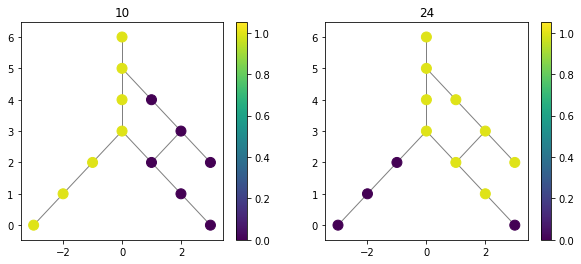

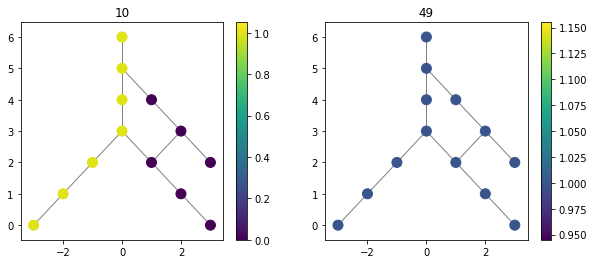

In [0]:
sim = sim_dist(gen1, gen2, n_dist_B1, 0)
for i in sim:
  plot_genes(i)

# Comparación entre medidas

In [0]:
# todas las distancias contra coseno
dist_C_B1 = (n_dist_B1 + 1) / (n_dist_C + 1)
dist_C_B2 = (n_dist_B2 + 1) / (n_dist_C + 1)
dist_C_B3 = np.zeros((n,n,13))
for k in range(13):
  dist_C_B3[:,:,k] = (n_dist_B3[:,:,k] + 1) / (n_dist_C + 1)

In [0]:
# todas las distancias contra accuracy
dist_A_B1 = (n_dist_B1 + 1) / (n_dist_A + 1)
dist_A_B2 = (n_dist_B2 + 1) / (n_dist_A + 1)
dist_A_B3 = np.zeros((n,n,13))
for k in range(13):
  dist_A_B3[:,:,k] = (n_dist_B3[:,:,k] + 1) / (n_dist_A + 1)

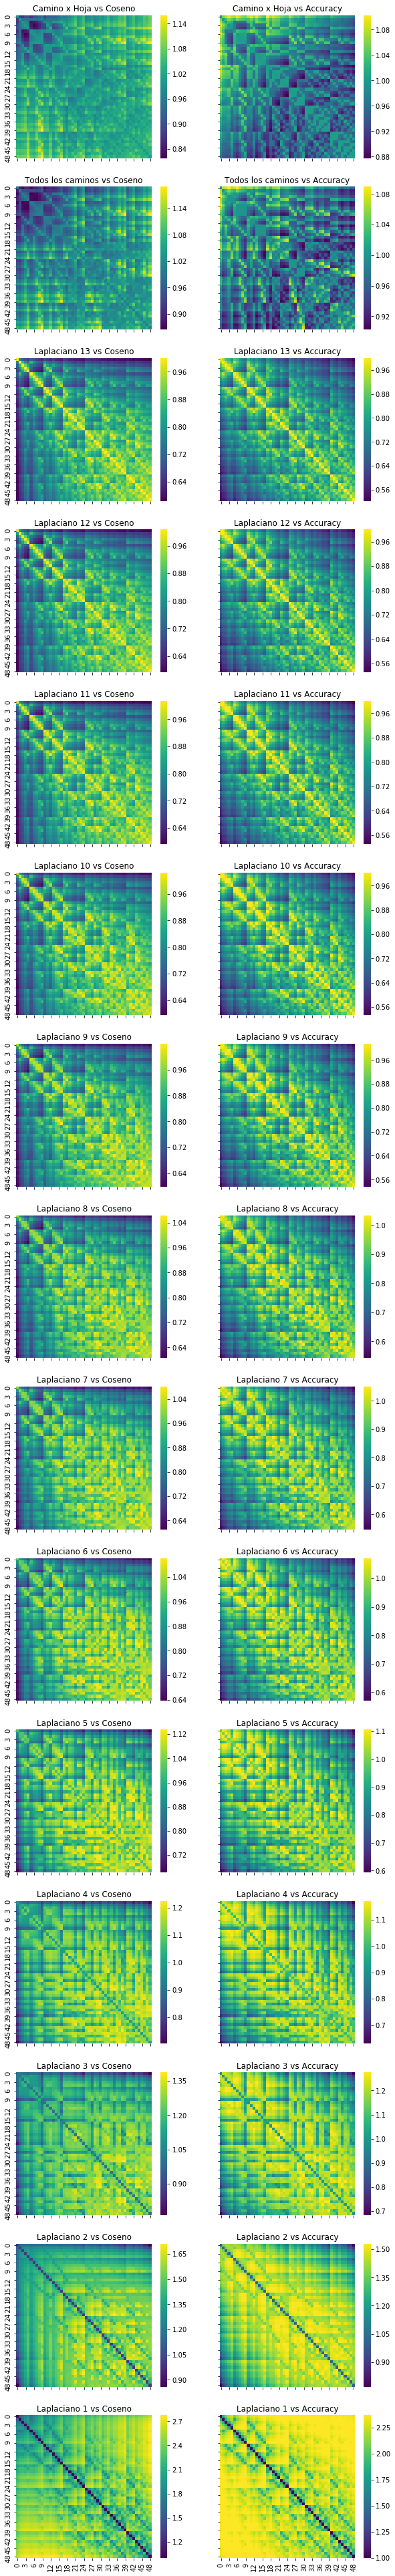

In [0]:
fig, ax = plt.subplots(15,2,figsize=(10,70), sharex=True, sharey=True)
maptype = 'viridis'

sns.heatmap(dist_C_B1, ax=ax[0,0], cmap = maptype)
ax[0,0].set_title('Camino x Hoja vs Coseno')
sns.heatmap(dist_A_B1, ax=ax[0,1], cmap = maptype)
ax[0,1].set_title('Camino x Hoja vs Accuracy')

sns.heatmap(dist_C_B2, ax=ax[1,0], cmap = maptype)
ax[1,0].set_title('Todos los caminos vs Coseno')
sns.heatmap(dist_A_B2, ax=ax[1,1], cmap = maptype)
ax[1,1].set_title('Todos los caminos vs Accuracy')

for k in range(13):
  sns.heatmap(dist_C_B3[:,:,k], ax=ax[2+k,0], cmap = maptype)
  ax[2+k,0].set_title('Laplaciano ' + str(13-k) + ' vs Coseno')
  sns.heatmap(dist_A_B3[:,:,k], ax=ax[2+k,1], cmap = maptype)
  ax[2+k,1].set_title('Laplaciano ' + str(13-k) + ' vs Accuracy')